<a href="https://colab.research.google.com/github/IqmanS/NLP-Assignments/blob/main/NLP_in_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iqman Singh Bhatia (102103189)

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1:
#### Find `Most Common Words` and create word cloud.

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
!wget https://github.com/IqmanS/Data-Science-Assignments/raw/main/datasets/data_clean.pkl -q
!wget https://raw.githubusercontent.com/IqmanS/Data-Science-Assignments/main/datasets/data_clean.csv -q
!wget https://raw.githubusercontent.com/IqmanS/Data-Science-Assignments/main/datasets/data_dtm.csv -q
!wget https://raw.githubusercontent.com/IqmanS/Data-Science-Assignments/main/datasets/data_dtm.pkl -q

#### Read in the document-term matrix

In [ ]:
data_dtm = pd.read_csv("/content/data_dtm.csv",index_col="Unnamed: 0")

data_dtm_trans = data_dtm.transpose()
data_dtm_trans.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,3,0,0
abc,1,0,0,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0,0,0


#### Find  and print the top 30 words said by each comedian


In [ ]:
top30_words = {}
for c in data_dtm_trans.columns:
    top = data_dtm_trans[c].sort_values(ascending=False).head(30)
    top30_words[c]= list(zip(top.index, top.values))

top30_words["ali"]

[('like', 126),
 ('im', 71),
 ('just', 64),
 ('know', 63),
 ('dont', 61),
 ('thats', 34),
 ('shit', 34),
 ('youre', 31),
 ('gonna', 28),
 ('ok', 26),
 ('lot', 24),
 ('oh', 21),
 ('gotta', 21),
 ('wanna', 21),
 ('husband', 20),
 ('time', 19),
 ('got', 19),
 ('right', 19),
 ('cause', 18),
 ('day', 17),
 ('women', 17),
 ('people', 15),
 ('need', 14),
 ('pregnant', 14),
 ('hes', 14),
 ('god', 14),
 ('yeah', 13),
 ('tell', 13),
 ('look', 12),
 ('dude', 12)]

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [ ]:
words = []
for comedian in data_dtm_trans.columns:
    top = [word for (word, count) in top30_words[comedian]]
    for t in top:
        words.append(t)

words[:10]

['like', 'im', 'just', 'know', 'dont', 'thats', 'shit', 'youre', 'gonna', 'ok']

In [ ]:
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('just', 10),
 ('know', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 10),
 ('people', 10),
 ('youre', 9),
 ('got', 9),
 ('gonna', 8),
 ('time', 7),
 ('think', 7),
 ('cause', 6),
 ('hes', 6),
 ('yeah', 6),
 ('said', 6),
 ('shit', 5),
 ('oh', 5),
 ('day', 5),
 ('say', 5),
 ('thing', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('really', 5),
 ('good', 4),
 ('fucking', 4),
 ('fuck', 4),
 ('tell', 3),
 ('did', 3),
 ('ive', 3),
 ('want', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('dude', 2),
 ('joke', 2),
 ('guy', 2),
 ('make', 2),
 ('transcriptsgeorge', 2),
 ('kubricktv', 2),
 ('reviewsmovie', 2),
 ('seriestv', 2),
 ('interviewsmusichistorybooks', 2),
 ('chappelleinterviewsplayboy', 2),
 ('carlindave', 2),
 ('comedy', 2),
 ('transcriptscomedystandup', 2),
 ('transcriptsstanley', 2),
 ('search', 2),
 ('scraps', 2),
 ('moviesmovie', 2),
 ('email', 2),
 ('movie', 2),
 ('weekly', 2),
 ('menumoviesmovie', 2),
 

#### If more than half of the comedians have it as a top word, exclude it from the list


In [ ]:
new_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
new_stop_words

['like',
 'im',
 'just',
 'know',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
# data_clean = pd.read_csv("/content/data_clean.csv",index_col="Unnamed: 0")
data_clean = pd.read_pickle("/content/data_clean.pkl")


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=list(stop_words))
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
data_dtm.to_pickle("data_dtm.pkl")
data_dtm_trans.to_pickle("data_dtm_trans.pkl")

In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud


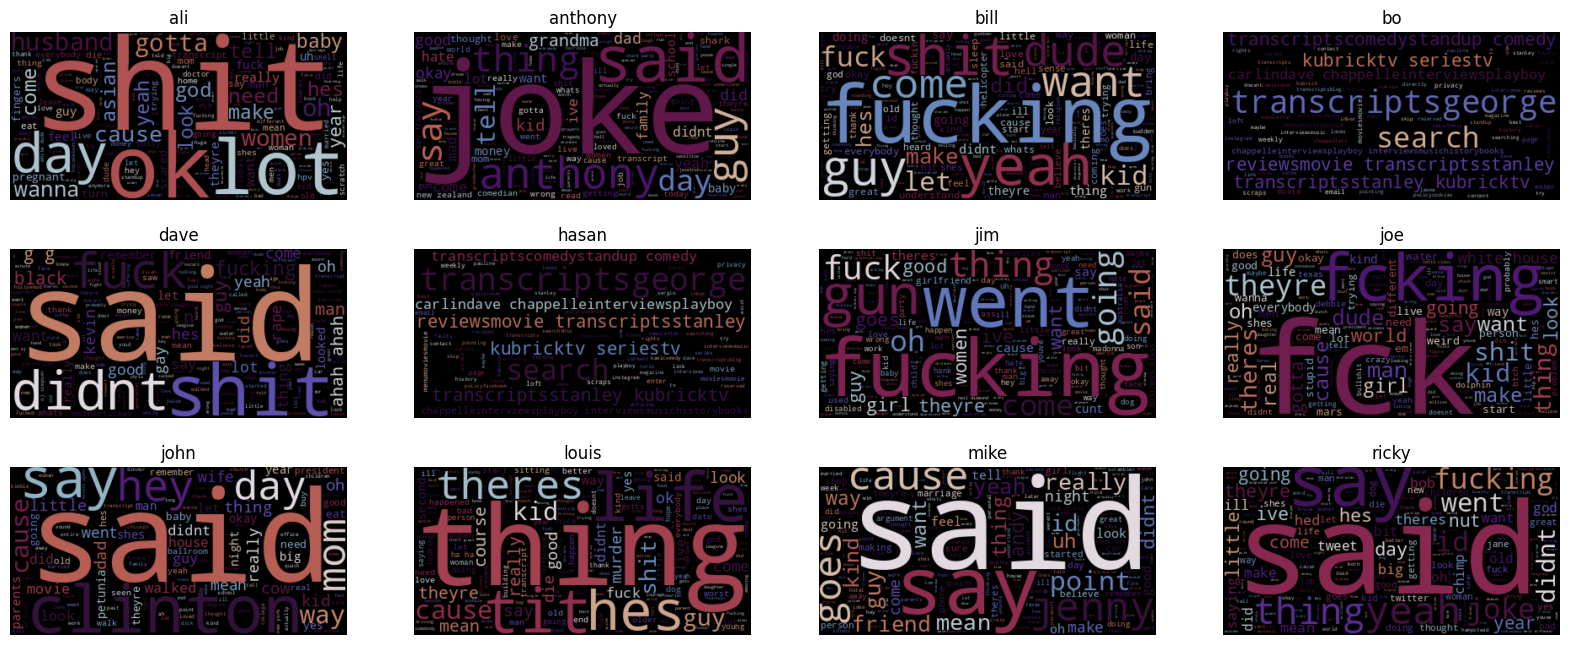

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="black", colormap="twilight", max_font_size=150, random_state=42)

plt.subplots(3,4,figsize=(20,8))

# Create subplots for each comedian
for index, comedian in enumerate(data_dtm_trans.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)

plt.show()

#### You observations
<ol>
<li> Ali says 'SHIT' alot.
<li> Anthony says 'JOKE' alot.
<li> Bill says 'FUCKING' alot.
<li> Louis says 'THING' alot.


### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [ ]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data_dtm_trans.columns:
    uniques = data_dtm_trans[comedian][data_dtm_trans[comedian]>0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data_dtm_trans.columns, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
3,bo,72
5,hasan,72
1,anthony,1154
9,louis,1243
6,jim,1442
0,ali,1487
4,dave,1540
8,john,1540
7,joe,1592
10,mike,1635


In [ ]:
# Find the total number of words that a comedian uses
total_list = []
for comedian in data_dtm_trans.columns:
    totals = sum(data_dtm_trans[comedian])
    total_list.append(totals)

# Comedy special run times from IMDB (in minutes)
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
5,hasan,72,116,73,1.589041
3,bo,72,116,60,1.933333
1,anthony,1154,3201,59,54.254237
0,ali,1487,3517,60,58.616667
9,louis,1243,3566,58,61.482759
4,dave,1540,4311,67,64.343284
6,jim,1442,4996,77,64.883117
10,mike,1635,4984,76,65.578947
11,ricky,1778,5211,79,65.962025
8,john,1540,4260,62,68.709677


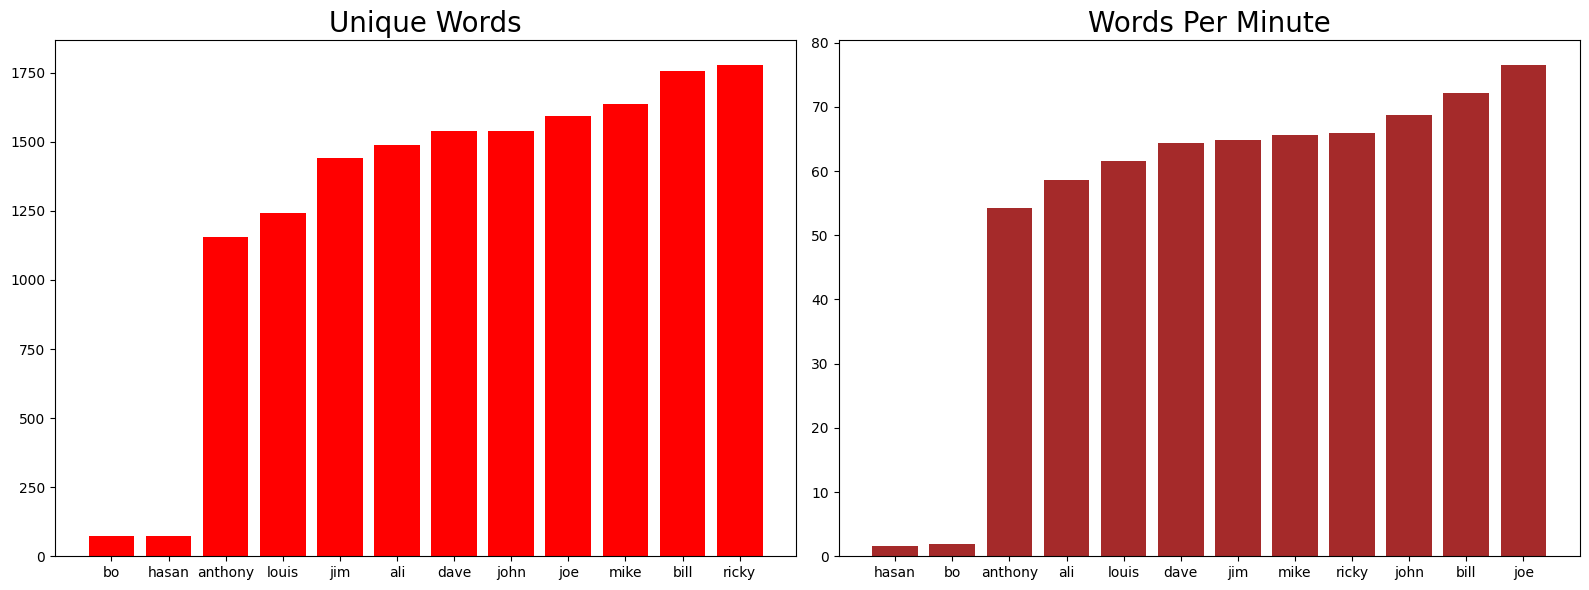

In [ ]:
# plot our findings
import numpy as np

y_pos = np.arange(len(data_words)) # Return evenly spaced values within a given interval. Stop at len(data_words)
plt.subplot(1, 2, 1) # plt.subplot (nrows, ncols, index)
plt.bar(y_pos, data_unique_sort.unique_words, align='center',color="red")
plt.xticks(y_pos, data_unique_sort.comedian)
plt.title('Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.bar(y_pos, data_wpm_sort.words_per_minute, align='center',color="brown")
plt.xticks(y_pos, data_wpm_sort.comedian)
plt.title('Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#### Write your findings. For example:
* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3:
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit` etc.

In [ ]:
# isolate just these bad words
data_bad_words = data_dtm_trans.transpose()[['fucking', 'fuck', 'shit']]
data_bad_words["total"] = data_bad_words.sum(axis=1)
data_bad_words

,fucking,fuck,shit,total
ali,5,11,34,50
anthony,6,9,9,24
bill,71,36,64,171
bo,0,0,0,0
dave,32,33,45,110
hasan,0,0,0,0
jim,78,37,20,135
joe,0,0,38,38
john,2,2,6,10
louis,6,15,23,44


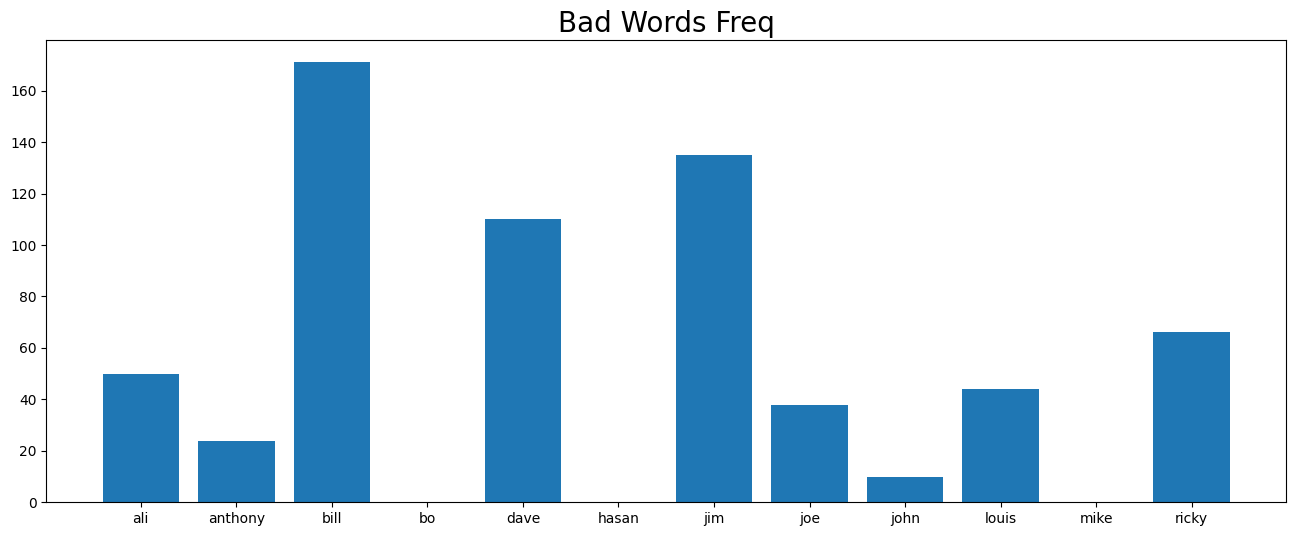

In [ ]:
# create a plot of your findings
plt.bar(height = data_bad_words.total,x=data_bad_words.index)
plt.xticks(y_pos, data_bad_words.index)
plt.title('Bad Words Freq', fontsize=20);